In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
def skin_segmentation(image):
    # Convertir en espace de couleur YCrCb
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    # Définir les seuils pour détecter la couleur de la peau
    lower = np.array([0, 133, 77], dtype=np.uint8)
    upper = np.array([255, 173, 127], dtype=np.uint8)
    # Créer un masque
    mask = cv2.inRange(ycrcb, lower, upper)
    return mask

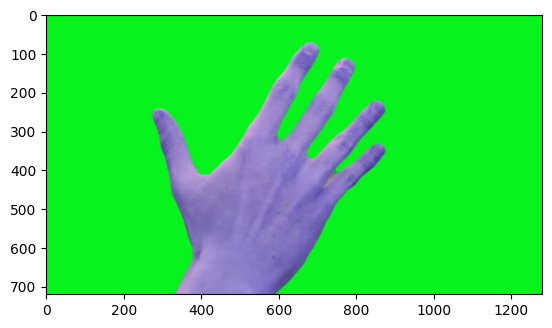

In [9]:
image = cv2.imread('./maxresdefault.jpg')
plt.imshow(image)

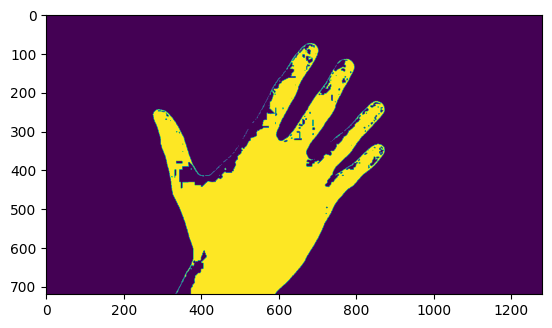

In [10]:
seg_image = skin_segmentation(image)
plt.imshow(seg_image)

In [11]:
def find_hand_contours(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Sélectionner le plus grand contour (supposé être la main)
        max_contour = max(contours, key=cv2.contourArea)
        return max_contour
    return None

In [13]:
contour_image = find_hand_contours(seg_image)

In [18]:
contour_image = contour_image.squeeze()

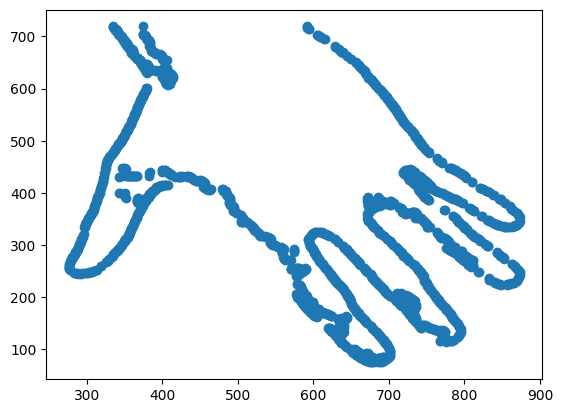

In [20]:
plt.scatter(contour_image[:, 0], contour_image[:, 1])

In [14]:
def analyze_gesture(contour):
    hull = cv2.convexHull(contour, returnPoints=False)
    if len(hull) > 3:
        defects = cv2.convexityDefects(contour, hull)
        if defects is not None:
            finger_count = 0
            for i in range(defects.shape[0]):
                s, e, f, d = defects[i, 0]
                start = tuple(contour[s][0])
                end = tuple(contour[e][0])
                far = tuple(contour[f][0])
                
                # Calculer les angles pour identifier les doigts levés
                a = np.linalg.norm(np.array(start) - np.array(far))
                b = np.linalg.norm(np.array(end) - np.array(far))
                c = np.linalg.norm(np.array(start) - np.array(end))
                angle = np.arccos((a**2 + b**2 - c**2) / (2 * a * b))  # Loi des cosinus
                
                if angle < np.pi / 2:  # Angle inférieur à 90°
                    finger_count += 1
            
            return finger_count + 1  # Ajouter 1 pour le pouce
    return 0

In [15]:
analyze_gesture(contour_image)

5

In [ ]:


# Fonction de segmentation colorimétrique


# Fonction pour détecter les contours de la main
def find_hand_contours(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Sélectionner le plus grand contour (supposé être la main)
        max_contour = max(contours, key=cv2.contourArea)
        return max_contour
    return None

# Fonction d'analyse de la forme de la main
def analyze_gesture(contour):
    hull = cv2.convexHull(contour, returnPoints=False)
    if len(hull) > 3:
        defects = cv2.convexityDefects(contour, hull)
        if defects is not None:
            finger_count = 0
            for i in range(defects.shape[0]):
                s, e, f, d = defects[i, 0]
                start = tuple(contour[s][0])
                end = tuple(contour[e][0])
                far = tuple(contour[f][0])
                
                # Calculer les angles pour identifier les doigts levés
                a = np.linalg.norm(np.array(start) - np.array(far))
                b = np.linalg.norm(np.array(end) - np.array(far))
                c = np.linalg.norm(np.array(start) - np.array(end))
                angle = np.arccos((a**2 + b**2 - c**2) / (2 * a * b))  # Loi des cosinus
                
                if angle < np.pi / 2:  # Angle inférieur à 90°
                    finger_count += 1
            
            return finger_count + 1  # Ajouter 1 pour le pouce
    return 0

# Répertoire contenant les images
image_dir = "images"  # Remplacez par votre chemin d'accès

# Traitement des images
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Charger l'image
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Impossible de charger {filename}.")
            continue
        
        # Étape 1 : Segmentation
        skin_mask = skin_segmentation(image)
        
        # Étape 2 : Extraction des contours
        hand_contour = find_hand_contours(skin_mask)
        
        # Étape 3 : Analyse et affichage des résultats
        if hand_contour is not None:
            cv2.drawContours(image, [hand_contour], -1, (0, 255, 0), 2)
            fingers = analyze_gesture(hand_contour)
            cv2.putText(image, f"Fingers: {fingers}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        else:
            cv2.putText(image, "No hand detected", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
        # Affichage des résultats
        cv2.imshow("Image", image)
        cv2.imshow("Mask", skin_mask)
        cv2.waitKey(0)  # Appuyez sur une touche pour passer à l'image suivante

cv2.destroyAllWindows()
